<a href="https://colab.research.google.com/github/Carlosrnes/group_work_PDS/blob/main/HW_Group.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Programming for Data Science Practical Examination
## Introduction 

The challenge of this pratical is to explore the public procurement data available in the portal www.base.gov.pt. <br>
Public Procurements are contracts establish between a public institutions (the issuer of a procurement) and a third-party supplier. <br>
Each contract is classified using the Common Procurement Vocabulary (CPV). The CPV classification aims at establishing a single classification system for public procurement in Europe, helping in comparative statistics and regulation. The CPV is a five level hierarchical classification encoded in a nine digit string. For instance the first two digits identify the division, the first three the groups, and so on. You can find more information about the CPVs at https://simap.ted.europa.eu/cpv


We will use a sample dataset extracted from the portal BASE (www.base.gov.pt) that contains information on public procurements executed between 2012 and 2014. Below you can find a step-by-step instructions of what the tasks you need to perform in order to analyse this dataset. Each step indicates the amount of points you can score. Make sure you comment all your code and provide, when requested, a discussion about what you have done and the results obtained.

This examination does not intend to test your ability to:<br>
. perform complex data analysis;<br>
. develop complex data-driven models; <br>
. write optimal algorithmic solutions to a problem. <br>

**Instead**, it aims to test your ability to implement a pre-planned step by step project in python.

Your submission will be graded according to the following guidelines:
1. Execution (does your program does what is asked from the exercise?)
2. Objectivity (are you using the adequate libraries? are you using a libraries not in the scope of exercise?)
3. Readibility of your code (is your code correctly documented? is variable naming adequate?)

This is an individual activity!

## Submission Details

The deadline for the submission is the 30th of October at 11:59 (am), and submission must be done through the corresponding activity in moodle. Your submission should consist of an archive **(zip file)** containing the following files: <br>
1) A copy of this notebook with your answers; <br>
2) A html version of the notebook with your answers (File -> Download As -> html); <br>
3) An Authorship Statement; <br> 

**Submissions done in .rar archives will not be graded. <br>
Submissions delivered that are not in a jupyter notebook format will not be graded.**

Good Luck, and enjoy!

**PLEASE FILL THE BELOW CELLS WITH THE GROUP MEMBERS INFORMATION:** <br>

In [ ]:
# Student ID:
# Student Name:

In [ ]:
# Student ID:
# Student Name:

In [ ]:
# Student ID:
# Student Name:

**Important NOTE**

Any reference to the value of procurement, refers to the price or cost of the contract which is in the column "precoContratual"

## Boilerplate

Before you start, let us make sure you have all the necessary packages in your working environment. To that end run the following cells to install and load all the necessary libraries.

**Note** You only need to run this cell once, not everytime you open the notebook.

In [ ]:
# Run this cell only if you are missing any of the packages below
import sys
!{sys.executable} -m pip install --upgrade pip --user
!{sys.executable} -m pip install xlrd
!{sys.executable} -m pip install requests
!{sys.executable} -m pip install seaborn

Then we load the necessary libraries to execute each of the steps below.

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels as sm
import os
from zipfile import ZipFile

In [2]:
import requests

In [3]:
print('Pandas version ',pd.__version__)
print('Numpy version ',np.__version__)
print('Scipy version ',sp.__version__)
print('Seaborn version ',sns.__version__)
print('StatsModels version ',sm.__version__)

Pandas version  1.1.5
Numpy version  1.19.5
Scipy version  1.4.1
Seaborn version  0.11.2
StatsModels version  0.10.2


In the following steps, please use the alias defined at this step. This will help us to correct your answers and track your steps. Students that fail to use the pre-defined aliases will be penalized. 

Finally, the following cell downloads the dataset for this project. <br>

In [4]:
r = requests.get('https://www.dropbox.com/s/43jqravvvddaljb/PDS2021_Data.zip?dl=1', allow_redirects=True)
open('Data.zip', 'wb').write(r.content);
with ZipFile('Data.zip', 'r') as zipObj:
    zipObj.extractall('DATA')

The above code will store the datafiles in a folder called "DATA" that is in the same filepath as this notebook. <br>
The dataset consists of three xlsx files containing all contracts available in 2018 concerning the contracts issued in 2012, 2013, and 2014 that where available in BASE.

## Exercises (The action starts here)

<b>[Step 1. | 0.5 points ]</b> Load all the procurement datafiles (contratos2012.xlsx, contratos2013.xlsx, and contratos2014.xlsx) into a single dataframe named <i>data</i>.<br>
Notes: This operation might take a while. When reading data from excel it is safer to always specify the Sheet you want to read. You might need to reset the indexes and drop a column of the final dataframe to obtain a more workable dataframe.

In [39]:
#data = pd.read_csv

In [40]:
data = pd.read_excel('/content/DATA/contratos2012.xlsx', sheet_name='Folha1')

<b>[Step 2. | 0.5 points ]</b> Perform some quick inspection of the data file in order to answer the following questions:
1. How many records does the dataset include?

In [41]:
data.shape

(64688, 14)

2. What are the fields names?

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64688 entries, 0 to 64687
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   idcontrato              64688 non-null  int64         
 1   nAnuncio                4109 non-null   object        
 2   tipoContrato            64688 non-null  object        
 3   tipoprocedimento        64688 non-null  object        
 4   objectoContrato         64686 non-null  object        
 5   adjudicantes            64688 non-null  object        
 6   adjudicatarios          64682 non-null  object        
 7   dataPublicacao          64688 non-null  datetime64[ns]
 8   dataCelebracaoContrato  64688 non-null  datetime64[ns]
 9   precoContratual         64688 non-null  float64       
 10  cpv                     64634 non-null  object        
 11  prazoExecucao           64688 non-null  int64         
 12  localExecucao           64688 non-null  object

3. What are the datatypes of each field?

In [43]:
data.dtypes

idcontrato                         int64
nAnuncio                          object
tipoContrato                      object
tipoprocedimento                  object
objectoContrato                   object
adjudicantes                      object
adjudicatarios                    object
dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
precoContratual                  float64
cpv                               object
prazoExecucao                      int64
localExecucao                     object
fundamentacao                     object
dtype: object

<b>[Step 3. | 3 points ]</b> As you have probably noticed our raw data is not exactly the cleanest dataset in the block. Indeed, we will need to perform some parsing in order to obtain a good working data. In that sense, write the necessary code to perform the following steps: <br>
1. Break the field <i>cpv</i> into two columns named <i>cpvDOC</i> and <i>CPV</i>.<br>
   The field <i>cpvDOC</i> should retain the CPV id, while the <i>CPV</i> its Description <br>
   For instance, a record with value "72416000-9, Fornecedores de aplicações" should lead to a <i>cpvDOC</i> equal to "72416000-9" and a <i>CPV</i> equal to "Fornecedores de aplicações" <br>
   
   
Use the head command to display the top 10 rows of these new columns (and only these new columns).

In [44]:
data.head(10)

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,adjudicantes,adjudicatarios,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao
0,85378,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano...,506579425 - Município de Faro,507358830 - Land Design -Paisagismo e Ambiente...,2012-02-21,2012-02-13,103000.00,79421200-3 - Serviços de concepção de projecto...,550,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Co..."
1,1308086,4606/2009,Empreitadas de obras públicas,Concurso público,09EPS0073 - Empreitada de construção do novo e...,505587815 - INST GESTAO FINANC INFRA-ESTRUTURA...,"508195985 - Ferreira Edinorte - Sul, ACE",2014-11-24,2012-11-14,5771641.83,45210000-2 - Construção de edifícios,900,"Portugal, Coimbra, Coimbra","Artigo 19.º, alínea b) do Código dos Contratos..."
2,115568,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA DE ADUÇÃO E ARMAZENAMENTO ...,"508160570 - VRSA Sociedade de Gestão Urbana, E...","505107929 - FTD, Consultores de Engenharia, Lda.",2012-10-08,2012-09-25,119700.00,71242000-6 - Preparação de projecto e concepçã...,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
3,115569,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviço...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",501453989 - Ecoserviços - Gestão de Sistemas E...,2012-09-14,2012-08-29,40500.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
4,115570,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE VILA NOVA D...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",504959239 - Cota 200 - Projetos e Consultoria ...,2012-10-04,2012-09-07,36600.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
5,115571,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DO SISTEMA INTERCEPTOR DE POCINHO / C...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",504959239 - Cota 200 - Projetos e Consultoria ...,2012-10-04,2012-09-07,65800.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
6,115572,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,LIGAÇÃO DAS REDES DE SANEAMENTO AO LONGO DA FR...,"508160570 - VRSA Sociedade de Gestão Urbana, E...","502305401 - Viés - Consultoria, Estudos e Proj...",2012-10-04,2012-09-27,44500.00,71242000-6 - Preparação de projecto e concepçã...,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
7,115573,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,O objecto principal é a contratação de serviço...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",501453989 - Ecoserviços - Gestão de Sistemas E...,2012-09-14,2012-08-29,31000.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
8,115574,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,LIGAÇÃO DAS REDES DE SANEAMENTO DA ZONA CENTRA...,"508160570 - VRSA Sociedade de Gestão Urbana, E...","502305401 - Viés - Consultoria, Estudos e Proj...",2012-10-04,2012-09-27,54800.00,71242000-6 - Preparação de projecto e concepçã...,150,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20.º, n.º 1, alínea a) do Código dos Co..."
9,115575,NaN,Aquisição de serviços,Ajuste Direto Regime Geral,PROJECTO DAS REDES DE DRENAGEM DE ÁGUAS RESIDU...,"508160570 - VRSA Sociedade de Gestão Urbana, E...",504959239 - Cota 200 - Projetos e Consultoria ...,2012-10-04,2012-09-07,31000.00,71242000-6 - Preparação de projecto e concepçã...,120,"Portugal, Faro, Vila Real Sto Antonio","Artigo 20

2. Convert any fields with dates to datetime objects. Show the datatypes of all fields after your conversion.<br>
**Tip:** You might want to check the link https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html for some tips regarding datetime conversion 



In [45]:
data[['dataPublicacao', 'dataCelebracaoContrato']].dtypes

dataPublicacao            datetime64[ns]
dataCelebracaoContrato    datetime64[ns]
dtype: object

3. In the fields <i>adjudicantes</i> (issuers) and <i>adjudicatários</i> (suppliers) you should have noticed that it includes both the name and the fiscal numbers (NIF) of the participating institutions.<br>
   For each of those two fields, split each record into two new fields. <br>
   <i>Entidade adjudicante - Nome, NIF</i> split into <i>issuerNIF</i> and <i>issuerName</i>.<br>
   <i>Entidade adjudicatária - Nome, NIF</i> split into <i>supplierNIF</i> and <i>supplierName</i>.<br>
   
   
   You will find that in some cases there are multiple entities in those fields, which are separated by "|". Explain: how have you worked around such cases? 
   
   If you are not able to perform this, feel free to ignore/drop the records that have multiple entities in each of those fields, but report what is the percentage of procurements that you would be dropping.

In [46]:
# new data frame with split value columns
adjudicantes = data["adjudicantes"].str.split(" - ", n = 1, expand = True)
  
# making separate first name column from new data frame
data["issuerNIF"]= adjudicantes[0].astype(int)
  
# making separate last name column from new data frame
data["issuerName"]= adjudicantes[1]
  
# Dropping old Name columns
data.drop(columns =["adjudicantes"], inplace = True)
  

# new data frame with split value columns
adjudicatarios = data["adjudicatarios"].str.split(" - ", n = 1, expand = True)
  
# making separate first name column from new data frame
data["supplierNIF"]= adjudicatarios[0]
  
# making separate last name column from new data frame
data["supplierName"]= adjudicatarios[1]
  
# Dropping old Name columns
data.drop(columns =["adjudicatarios"], inplace = True)

4. Verify that the parsing was successful 

In [48]:
# df display
data[["issuerNIF", "issuerName", "supplierNIF", "supplierName"]]

,issuerNIF,issuerName,supplierNIF,supplierName
0,506579425,Município de Faro,507358830,Land Design -Paisagismo e Ambiente Ldª. | 5083...
1,505587815,"INST GESTAO FINANC INFRA-ESTRUTURAS JUSTIÇA, IP",508195985,"Ferreira Edinorte - Sul, ACE"
2,508160570,"VRSA Sociedade de Gestão Urbana, EM, SA",505107929,"FTD, Consultores de Engenharia, Lda."
3,508160570,"VRSA Sociedade de Gestão Urbana, EM, SA",501453989,"Ecoserviços - Gestão de Sistemas Ecológicos, Lda"
4,508160570,"VRSA Sociedade de Gestão Urbana, EM, SA",504959239,Cota 200 - Projetos e Consultoria de Engenhari...
...,...,...,...,...
64683,500948089,Confederação do Comércio e Serviços de Portuga...,503504564,"EDP Comercial, SA"
64684,504515250,Profigaia - Sociedade de Educação e Formação T...,503604747,"Guacamaia - Empreitadas de Construção Civil, lda"
64685,506641376,Município de Vila Verde,176748474,Alfredo Fernando Baptista Teixeira Pedrosa
64686,671001426,Gabinete de Gestão da Loja do Cidadão da Madeira,511123680,XGT Soluções Informáticas SA


<b>[Step 4. | 5 points ]</b> Let us do some exploratory analysis of the data. The goal is to develop some familarity with the data, which we will do by answering some simple questions. Knowing which questions to ask is an important step for any successful data science project. In that sense, write down the necessary code to answer the following questions:

You can report the results using a meaningful visualization (check out https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html or the seaborn module)

1. What is the total value (precoContratual) of procurements per month?

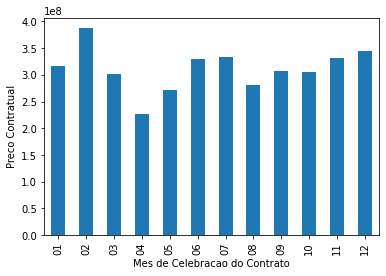

In [49]:
data.groupby(data.dataCelebracaoContrato.dt.strftime('%m'))['precoContratual'].sum().plot(kind='bar',stacked=True)

plt.xlabel('Mes de Celebracao do Contrato')
plt.ylabel('Preco Contratual')
plt.show()

2. How many procurements have been issued per **month of year**?

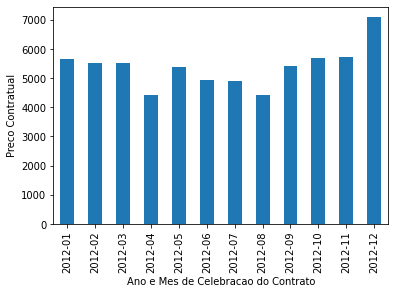

In [50]:
data.groupby(data.dataCelebracaoContrato.dt.strftime('%Y-%m'))['precoContratual'].count().plot(kind='bar',stacked=True)

plt.xlabel('Ano e Mes de Celebracao do Contrato')
plt.ylabel('Preco Contratual')
plt.show()

3. What is the distribution of values? In other words, what is the proportion of procurements that have value X?  
Can you build a visualization and highlight what you found more interesting and discuss it? 

**Note:** Consider working with the Logarithm base 10 of values; Consider use predefined bin in the X values.

4. In the dataset, how many issuing Institutions are there? And how many suppliers?

In [51]:
issuing = data['issuerNIF'].nunique()

issuing

supplier = data['supplierNIF'].nunique()

print('There are ', issuing, ' and ', supplier)

There are  3618  and  20498


5. What services has ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL (NIF: 502322152) supplied? And who are the top three issuers/beneficiaries of such services?

In [73]:
ISEGI = data[data['issuerName']=='ISEGI-Inst Superior de Estatistica e Gestão de Informação da UNL']

#ISEGI = ISEGI.groupby('cpv')['precoContratual'].sum()

ISEGI

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,issuerNIF,issuerName,supplierNIF,supplierName


6. What are the top five services (CPV) contracted by Hospital de Santa Maria Maior (NIF: 506361381)?

In [75]:
ISEGI = data[data['issuerNIF']==506361381]

#ISEGI = ISEGI.groupby('cpv')['precoContratual'].sum()

ISEGI.nlargest(5)

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,issuerNIF,issuerName,supplierNIF,supplierName
19929,864457,NaN,Aquisição de bens móveis,Ajuste Direto Regime Geral,Ciclofosfamida Pó Sol Inj Fr IV de 500mg e 1000mg,2013-10-22,2012-06-11,367.20,"33000000-0 - Equipamento médico, medicamentos ...",205,"Portugal, Braga, Barcelos","Artigo 24.º, n.º 1, alínea e) do Código dos Co...",506361381,"Hospital Santa Maria Maior, EPE",503347345,BAXTER MEDICO FARMACEUTICA LDA
19930,864464,NaN,Aquisição de bens móveis,Ajuste Direto Regime Geral,Tenofovir 245 mg Comp e Adefovir 10 mg Comp,2013-10-22,2012-06-11,76500.00,"33000000-0 - Equipamento médico, medicamentos ...",205,"Portugal, Braga, Barcelos","Artigo 24.º, n.º 1, alínea e) do Código dos Co...",506361381,"Hospital Santa Maria Maior, EPE",503604704,"GILEAD SCIENCES, LDA"
22493,865627,NaN,Aquisição de bens móveis,Ajuste Direto Regime Geral,Enoxaparina Sódica 20mg/ 40mg/ 60mg,2013-10-23,2012-07-18,28877.68,"33620000-2 - Medicamentos para o sangue, para ...",168,"Portugal, Braga, Barcelos","Artigo 24.º, n.º 1, alínea e) do Código dos Co...",506361381,"Hospital Santa Maria Maior, EPE",500134960,"Sanofi - Produtos Farmacêuticos, Lda."


7. What services (CPV) has Novo Banco, S.A. (NIF: 513204016) supplied? Aggregate the output by CPV and sort by descending order of total value.

8. Can you measure the correlation between the length/duration of contract ("prazoExecucao") and the final value ("precoContratual")? Are longer contracts more costly?<br>
(Remember there might already exist a method to help you out)
    
    8.1 What if you plot the average price per day as a function of the duration of the contract? What relationship to you obtain?
    
Note: The objective is to aggregate all contracts with a duration X, and then compute the average cost/value per day of such contracts. What relationship do you observe? Are longer contracts cheaper in a daily cost? Or more expensive?

<b>[Step 5. | 5 points ]</b> You probably have noticed that our dataset includes procurements issued by municipalities (Câmara Municipal or Município). Interesting huh?

Next, we will explore municipality procurement data a bit more in detail. To that end, we will need to process our procurement dataset, in order to obtain the procurements of each municipality, aggregate the data and obtain the relevant metrics.

However, the data is not uniform as some typos lead to the same municipality having different names. Moreover, there are municipal companies that have a different fiscal code than the municipalities. To make it simple, let us ignore municipal companies. Moreover, we have prepared beforehand a .csv file that lists all the NIF ids associated wit each municipality.

**NOTE. The file MunicipiosNIF.xlsx is available to download from Moodle.**

1. Download the file MunicipiosNIF.xlsx from Moodle and load it into a dataframe;

In [52]:
municipiosNIF = pd.read_excel('MunicipiosNIF.xlsx', sheet_name='Sheet1')

municipiosNIF

,NIF,Municipality
0,500051054,Município de Almada
1,500051062,Município de Sintra
2,500051070,Município de Lisboa
3,500745773,Município de Alcanena
4,500745943,Município de Oeiras
...,...,...
303,512074410,Município de Lagoa - Açores
304,512074771,Município de São Roque do Pico
305,512074836,Município de Lajes das Flores
306,512075506,Município das Velas


2. Create a new dataframe that contains only the procurements issued by municipalities. Use the dataframe created above to aid your filtering.

**Note:** you will end up with situations where the same municipality will have different names, although it has the same NIF. Consider using only the NIF as the unique identifier of a municipality, and if there are multiple names associated to it, to choose one. Explain how did you proceed.

In [57]:
df = pd.merge(data,municipiosNIF, left_on='issuerNIF',right_on='NIF',how="outer",indicator=True)

procurements_municipalities = df[df['NIF']!='NaN']

procurements_municipalities.head(5)

,idcontrato,nAnuncio,tipoContrato,tipoprocedimento,objectoContrato,dataPublicacao,dataCelebracaoContrato,precoContratual,cpv,prazoExecucao,localExecucao,fundamentacao,issuerNIF,issuerName,supplierNIF,supplierName,NIF,Municipality,_merge
0,85378.0,4227/2009,Aquisição de serviços,Concurso público,Prestação de Serviços para Elaboração do Plano...,2012-02-21,2012-02-13,103000.00,79421200-3 - Serviços de concepção de projecto...,550.0,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Co...",506579425.0,Município de Faro,507358830,Land Design -Paisagismo e Ambiente Ldª. | 5083...,506579425.0,Município de Faro,both
1,306651.0,2063/2011,Concessão de serviços públicos,Concurso público,Concessão de exploração de estacionamento nas ...,2012-02-16,2012-02-01,0.00,63712400-7 - Serviços de estacionamento,2610.0,"Portugal, Faro, Faro","Artigo 31.º, n.º 1 do Código dos Contratos Púb...",506579425.0,Município de Faro,503496553,"Masitrave, Lda",506579425.0,Município de Faro,both
2,339619.0,3183/2011,Outros,Concurso público,Fornecimento contínuo de produtos químicos par...,2012-03-16,2012-02-08,27208.00,98300000-6 - Serviços diversos,730.0,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Co...",506579425.0,Município de Faro,504486799,"Sagilab-Laboratório de Análise Técnicas,SA",506579425.0,Município de Faro,both
3,339620.0,3183/2011,Outros,Concurso público,Fornecimento contínuo de produtos químicos par...,2012-03-16,2012-02-20,20733.30,39830000-9 - Produtos de limpeza,730.0,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Co...",506579425.0,Município de Faro,506565165,"Prodyalca - Comércio de Produtos Químicos, Ldª",506579425.0,Município de Faro,both
4,339621.0,3183/2011,Outros,Concurso público,Fornecimento contínuo de produtos químicos par...,2012-03-16,2012-03-05,62595.82,24962000-5 - Produtos químicos para tratamento...,730.0,"Portugal, Faro, Faro","Artigo 20.º, n.º 1, alínea b) do Código dos Co...",506579425.0,Município de Faro,500076219,"Certikin Portugal, Lda",506579425.0,Município de Faro,both


3. What are the top ten suppliers in terms of value (total cost in euros) spent by the municipality of Lisbon?

In [68]:
top_ten_suppliers = procurements_municipalities[procurements_municipalities['issuerName']=='Município de Lisboa']

top_ten_suppliers = top_ten_suppliers.groupby('cpv')['precoContratual'].sum()

top_ten_suppliers.nlargest(10)

cpv
45215215-7 - Construção de infantário                                    6623790.90
45112700-2 - Trabalhos de paisagismo                                     6117507.47
45211350-7 - Construção de edifícios multifuncionais                     6116109.11
45212100-7 - Construção de instalações para ocupação de tempos livres    5530271.15
09310000-5 - Electricidade                                               2860192.00
45262000-1 - Construções especializadas excepto obras de cobertura       1930933.46
45233251-3 - Renovação de pavimentos                                     1588375.05
45111100-9 - Demolição                                                   1550647.36
45262690-4 - Restauração de edifícios degradados                         1449516.45
92620000-3 - Serviços relacionados com o desporto                        1431951.92
Name: precoContratual, dtype: float64

4. What are the top ten services in terms of value (total cost in euros) supplied to the Municipality of Lisbon?

In [66]:
top_ten_services = procurements_municipalities[(procurements_municipalities['issuerName']=='Município de Lisboa') & (procurements_municipalities['tipoContrato']=='Aquisição de serviços')]

top_ten_services = top_ten_services.groupby('objectoContrato')['precoContratual'].sum()

top_ten_services.nlargest(10)

objectoContrato
fornecimento de energia eléctrica                                                                                                                                                                           2860192.00
Contrato escrito nº 12026063 - AQUISIÇÃO DE SERVIÇOS Nº 30/DMPO/DOIS/DCMIS/2010 - LIMPEZA E DESOBSTRUÇÃO DE COLECTORES DO MUNICÍPIO DE LISBOA - Processo nº 10/DMF/CCM/DP/2011                               302979.17
Prestação de serviços de assistência técnica integral  a 201 equiopamentos multifunções de reprodução e impressão da marca Xerox                                                                             300000.00
Aquisição de serviços de conceção, produção e realização do espetáculo de Fim de Ano 2012/2013 Tejo + Tejo                                                                                                   290673.25
Aquisição de serviços de assistência técnica pós-venda ao software Oracle, pelo periodo de 6 meses.                         

5. Compute the average value of the procurements (only those contracted by municipalities) per supplier. <br>
    5.1 Show as an histogram the number of companies that received a total amount X from municipalities. <br>
    5.2 Identify the top 10 companies that received more money from municipalities.

6. What is the most common "tipoprocedimento" of procurements issued by municipalities? <br>
    6.1 What if you consider only procurements with a value above 50 000 euros? <br>
    6.2 How do you relate/compare these results with those obtained in Question 3 of Step 4?

<b>[Step 6. | 4 points ]</b> Next, and in the spirit of a vast scientific literature on Urban Scaling Laws (https://tinyurl.com/y8ohmzx7), let us investigate the relationship between the number and value of procurements issued by municipalities and their population size.

To that end we will need to download and load an additional dataset that includes the population size of each municipality.<br> 
This dataset was obtained from the portal pordata. As is the case in many data science projects we don't have a perfect matching key between the population data and the procurement data we have been working so far. 

**NOTE. The file popsize.csv is available for download from Moodle.**

1. Download the file popsize.csv from Moodle and load it to a dataframe. <br>
    1.1 Explore the dataframe and explain how can you link this data to the procurement data.

Explanation:

2. Create a new dataframe in which contracts are aggregated by municipality. You should have a dataframe in which the columns correspond to: NIF; Municipality Name; Population Size; Number of Issued Procurements; Total Value of Issued Procurements. 

**Note:** You will have to merge at least two dataframes, and apply several aggregations.

3. It is common procedure to compare not the absolute values of the different dimensions but their Logarithm. In that sense, create three new columns in your dataframe that correspond to: <br>
    i) The Logarithm of base 10 of the Total Value of Issue Procurements; <br>
    ii) Number of Issued Procurements; <br>
    iii) Population Size.

4. Compute the pearson correlation between the municipalities Log of the Population Size with: <br>
    i) the Log of Total Number of Issued Procurements; <br>
    ii) the Log of the Total Value of Issued Procurements. 
    
    Use the columns you pre computed in the previous question.
    
    4.1 **Make a scatter plot** for each pair of variables to assess the identified relationship.

5. Can you build a linear model using the library Statsmodel that regresses the Logarithms of the Total Value of issued procurements as a funcion of the population size? What coefficient did you find? <br>
**Tip:** You might to to look for some inspiration in the final part of Lab 7

6. What if instead of the Total Value of issued procurments you had the Value per capita (per capita means per person in the local population)? How would that impact the results in points 6.4 and 6.5?<br>


<b>[Step 7. | 2 point ]</b> Open Question. <br>
Given the dataset you have been exploring, and the analysis conducted over the municipalities procurement dataset with the population data. Can you think about a question that you consider interesting to explore? Does it require to obtain additional data from, for instance, pordata?

**On this final step you have full control. Be creative and show us your ability to raise a question, identify which data you require to explore it, and report the results. Be as objective and clear as possible with your answer.**

Use as many cells as necessary.

## End

Submit this notebook in Moodle along with a statement of authorship in a single .zip archive.